#                                 Abalone case study

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


# data overview

In [6]:
df.shape

(4177, 9)

In [7]:
df.info


<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

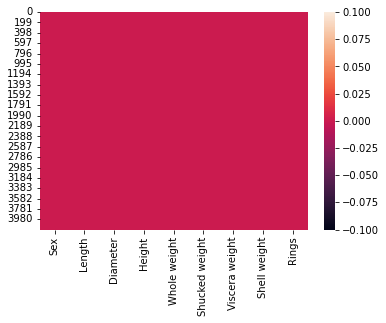

In [11]:
sns.heatmap(df.isnull())

The hitmap clearly shows that there is no any null value.

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Exploratory Data Analysis(EDA)

In [17]:
# Data Visualization:


In [18]:
#data count
df.count

<bound method DataFrame.count of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.14

<AxesSubplot:xlabel='Length', ylabel='Density'>

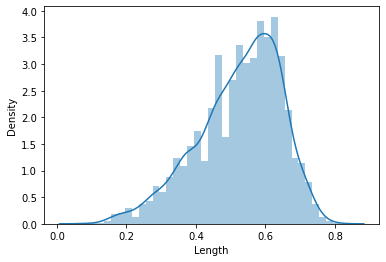

In [23]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

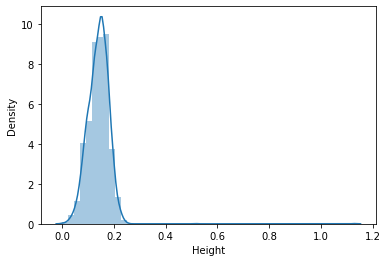

In [22]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

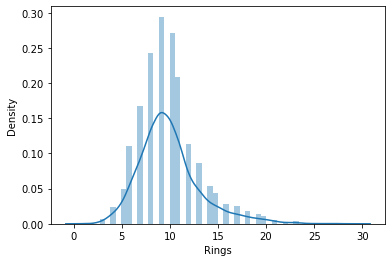

In [25]:
sns.distplot(df['Rings'])


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

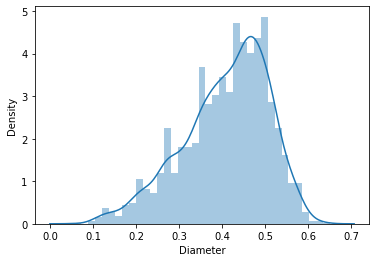

In [27]:
sns.distplot(df['Diameter'])


<AxesSubplot:xlabel='Sex', ylabel='count'>

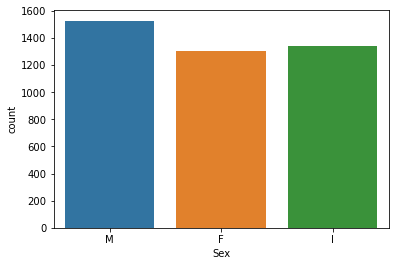

In [28]:
sns.countplot(x='Sex',data=df)

In [29]:
#Sex Ratio in Abalone
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

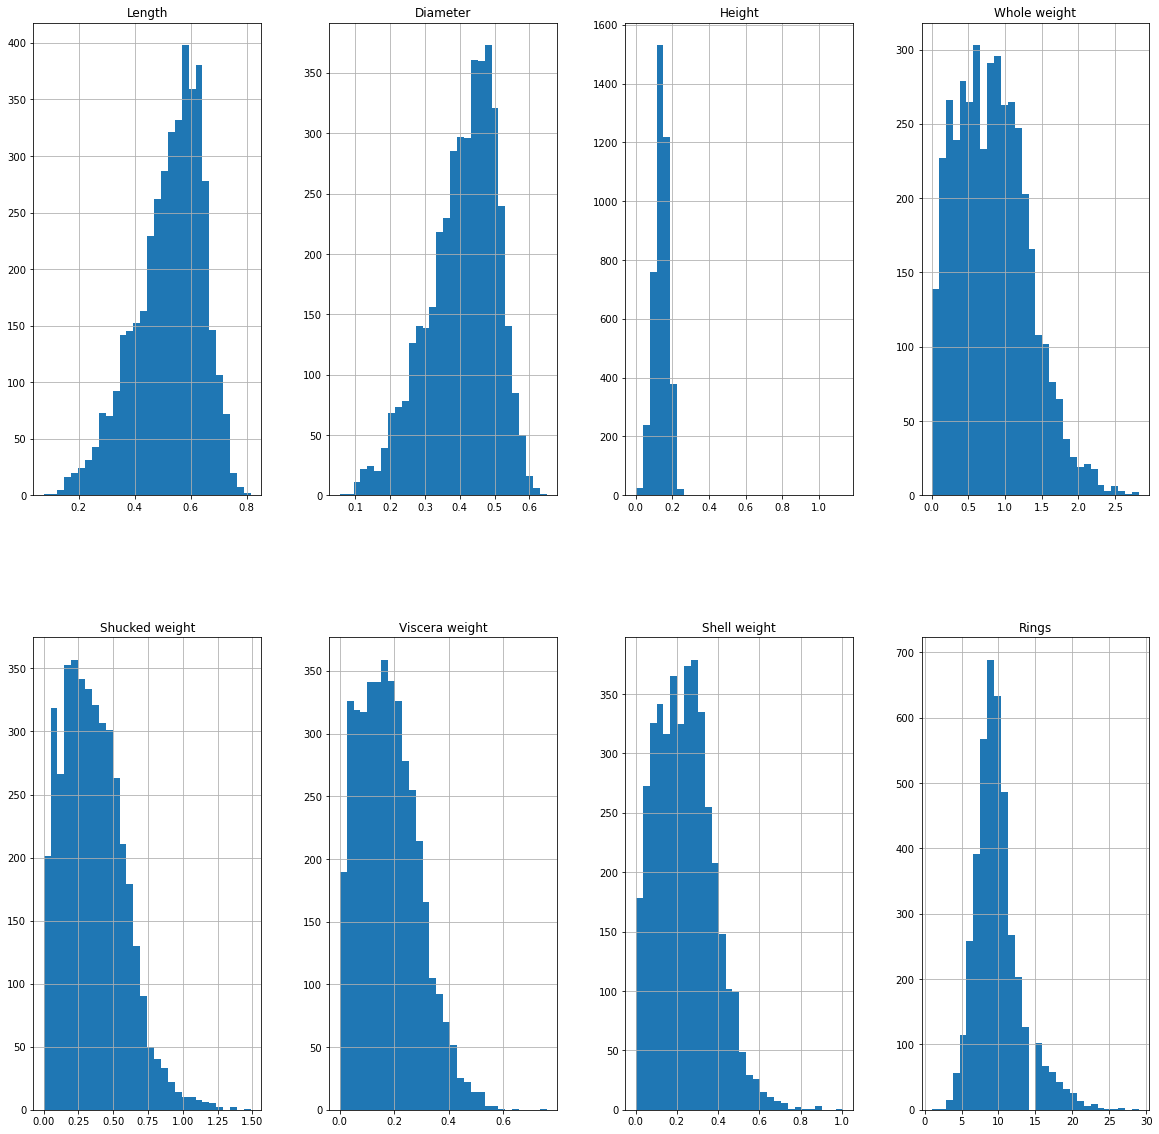

In [38]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

# checking out the skewness of data

In [41]:
skewness=df.skew()

In [42]:
skewness

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# using lebel encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [48]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [49]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [50]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

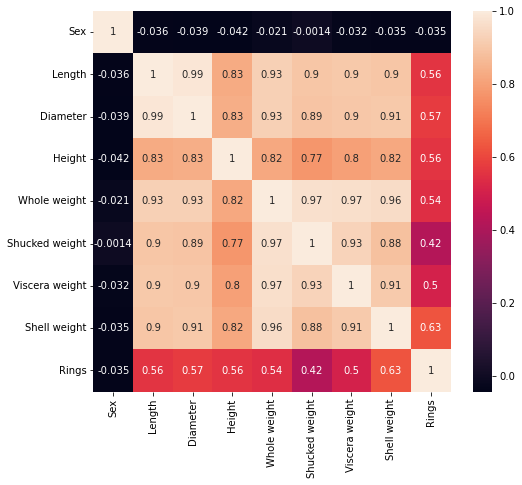

In [52]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [54]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [56]:
df_new.shape

(4027, 9)

In [58]:
df_new.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000


# training and testing phase:

In [68]:
#selecting input and output(target)/x and y:
y=df_new[['Rings']]
x=df_new.drop(['Rings'], axis = 1)

# Encoding: standard Scaler(doing all the input values scaler for betterment of accuracy)

In [69]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [70]:
xf=pd.DataFrame(data=x)

In [71]:
#input values
xf

,0,1,2,3,4,5,6,7
0,1.159698,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,1.159698,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-1.285382,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,1.159698,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-0.062842,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290
...,...,...,...,...,...,...,...,...
4022,-1.285382,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240
4023,1.159698,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138
4024,1.159698,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453
4025,-1.285382,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647


In [72]:
x_train,x_test,y_train,y_test=train_test_split(xf,y,test_size=.33,random_state=42)

In [73]:
x_train.shape

(2698, 8)

In [75]:
y_train.shape

(2698, 1)

In [76]:
x_test.shape

(1329, 8)

In [77]:
y_test.shape

(1329, 1)

# LinearRegression

In [78]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [82]:
lm.score(x_train,y_train)


0.5159645062909544

In [83]:
lm.coef_

array([[ 0.05351702, -0.28437995,  1.17217629,  0.86069368,  3.10836327,
        -3.58531468, -0.69301306,  1.03976689]])

In [84]:
lm.intercept_

array([9.69048943])

In [86]:
# predict using x_test values
y_pred = lm.predict(x_test)
print(y_pred)
y_pred = np.round(y_pred)

[[ 8.62053035]
 [ 9.9941614 ]
 [11.6187725 ]
 ...
 [ 9.75167392]
 [11.95032521]
 [11.38476212]]


In [88]:
# Evaluation of the model
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred)))


Mean Absolute Error     :  1.4635063957863055
Root Mean Squared Error :  1.2097546841348892


<AxesSubplot:>

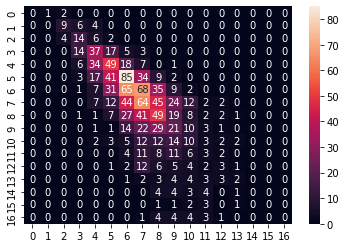

In [89]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True)

# DecisionTreeRegressor

In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=142)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=142)

In [92]:
y_pred_dtr = dtr.predict(x_test)
print(y_pred_dtr)
y_pred_dtr = np.round(y_pred_dtr)

[ 8.  9.  8. ... 10. 17.  8.]


In [93]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_dtr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_dtr)))

Mean Absolute Error     :  1.908201655379985
Root Mean Squared Error :  1.3813767246410318


<AxesSubplot:>

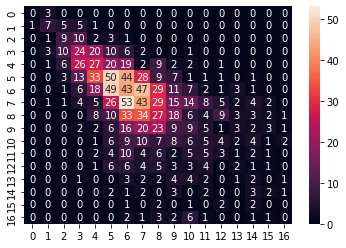

In [94]:
cf_matrix = confusion_matrix(y_test, y_pred_dtr)
sns.heatmap(cf_matrix, annot = True)

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
rfr.score(x_train,y_train)

0.9341670991163955

In [110]:
y_pred_rfr = dtr.predict(x_test)
print(y_pred_rfr)
y_pred_dtr = np.round(y_pred_)

[ 8.  9.  8. ... 10. 17.  8.]


In [111]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_rfr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_rfr)))

Mean Absolute Error     :  1.908201655379985
Root Mean Squared Error :  1.3813767246410318


<AxesSubplot:>

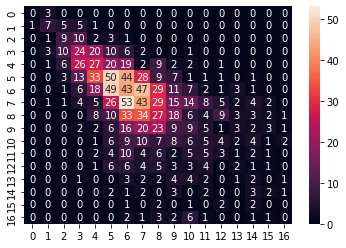

In [112]:
cf_matrix = confusion_matrix(y_test, y_pred_rfr)
sns.heatmap(cf_matrix, annot = True)

# SVM

In [114]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(x_train, y_train)

SVR()

In [119]:
y_pred_svr = svr.predict(x_test)
print(y_pred_svr)
y_pred_svr = np.round(y_pred_svr)

[ 8.15990848  9.62152849 12.73850079 ...  9.97825899 11.01321927
 11.21590048]


In [120]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_svr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_svr)))

Mean Absolute Error     :  1.380737396538751
Root Mean Squared Error :  1.1750478273409772


<AxesSubplot:>

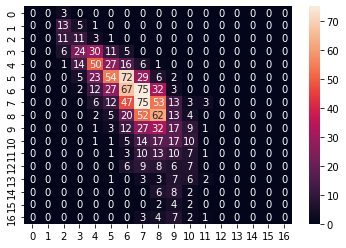

In [121]:
cf_matrix = confusion_matrix(y_test, y_pred_svr)
sns.heatmap(cf_matrix, annot = True)